# Курсовая работа. Блок ML Beginner
<br>

**NB!** Код должен быть с комментариями к каждому логическому блоку кода. В противном случае работа **не** будет принята. <br><br>
Выполнение курсовой работы может потребовать использование дополнительных библиотек. Может потребоваться предварительная обработка данных.

<br><br>
**Описание работы:**
&nbsp;&nbsp;&nbsp;&nbsp;
<br><br>
&nbsp;&nbsp;&nbsp;&nbsp; Любой бизнес хочет максимизировать количество клиентов. Для достижения этой цели важно не только пытаться привлечь новых, но и удерживать уже существующих. Удержать клиента обойдется компании дешевле, чем привлечь нового. Кроме того, новый клиент может оказаться слабо заинтересованным в услугах бизнеса и с ним будет сложно работать, тогда как о старых клиентах уже есть необходимые данные по взаимодействию с сервисом. 
 <br>

&nbsp;&nbsp;&nbsp;&nbsp; Соответственно, прогнозируя отток, мы можем вовремя среагировать и попытаться удержать клиента, который хочет уйти. Опираясь на данные об услугах, которыми пользуется клиент, мы можем сделать ему специальное предложение, пытаясь изменить его решение об уходе от оператора. Благодаря этому задача удержания будет легче в реализации, чем задача привлечения новых пользователей, о которых мы еще ничего не знаем.<br>

&nbsp;&nbsp;&nbsp;&nbsp; Вам предоставлен набор данных от телекоммуникационной компании. В данных содержится информация о почти шести тысячах пользователей, их демографических характеристиках, услугах, которыми они пользуются, длительности пользования услугами оператора, методе оплаты, размере оплаты. 
<br>

&nbsp;&nbsp;&nbsp;&nbsp; Cтоит задача проанализировать данные и спрогнозировать отток пользователей (выявить людей, которые продлят контракт и которые не продлят). Работа должна включать в себя следующие обязательные пункты: 
1. Описание данных *(с расчетом базовых статистик)*, 
2. Исследование зависимостей и формулирование гипотез, 
3. Построение моделей для прогнозирования оттока *(с обоснованием выбора той или иной модели)* на основе проверенных гипотез и выявленных взаимосвязей, 
4. Сравнение качества полученных моделей. 

Во втором разделе обязательно должно присутствовать обоснование гипотез, подробное описание выявленных взаимосвязей, а также их визуализация. 
<br>В четвертом дополнительно должны быть сформулированы общие выводы работы.

<br><br>

_________

[Codebook](#Codebook) <br>
[1. Описание данных](#1.-Описание-данных)<br>
[2. Исследование зависимостей и формулирование гипотез](#2.-Исследование-зависимостей-и-формулирование-гипотез)<br>
[3. Построение моделей для прогнозирования оттока](#3.-Построение-моделей-для-прогнозирования-оттока)<br>
[4. Сравнение качества моделей](#4.-Сравнение-качества-моделей) <br>


## Codebook
<br>

[Ссылка для скачивания данных](https://drive.google.com/open?id=1dPCG76ST6NohYKtVMGv6HpFL-jD5p1eJ) 
<br><br>

`telecom_users.csv` содержит следующие значения:<br><br>

&nbsp;&nbsp;&nbsp;&nbsp; `customerID` – id клиента<br>
&nbsp;&nbsp;&nbsp;&nbsp; `gender` – пол клиента (male/female)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `SeniorCitizen` – яляется ли клиент пенсионером (1, 0)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `Partner` – состоит ли клиент в браке (Yes, No)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `Dependents` – есть ли у клиента иждивенцы (Yes, No)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `tenure` – сколько месяцев человек являлся клиентом компании<br>
&nbsp;&nbsp;&nbsp;&nbsp; `PhoneService` – подключена ли услуга телефонной связи (Yes, No)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `MultipleLines` – подключены ли несколько телефонных линий (Yes, No, No phone service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `InternetService` – интернет-провайдер клиента (DSL, Fiber optic, No)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `OnlineSecurity` – подключена ли услуга онлайн-безопасности (Yes, No, No internet service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `OnlineBackup` – подключена ли услуга online backup (Yes, No, No internet service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `DeviceProtection` – есть ли у клиента страховка оборудования (Yes, No, No internet service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `TechSupport` – подключена ли услуга технической поддержки (Yes, No, No internet service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `StreamingTV` – подключена ли услуга стримингового телевидения (Yes, No, No internet service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `StreamingMovies` – подключена ли услуга стримингового кинотеатра (Yes, No, No internet service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `Contract` – тип контракта клиента (Month-to-month, One year, Two year)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `PaperlessBilling` – пользуется ли клиент безбумажным биллингом (Yes, No)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `PaymentMethod` – метод оплаты (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))<br>
&nbsp;&nbsp;&nbsp;&nbsp; `MonthlyCharges` – месячный размер оплаты на настоящий момент<br>
&nbsp;&nbsp;&nbsp;&nbsp; `TotalCharges` – общая сумма, которую клиент заплатил за услуги за все время<br>
&nbsp;&nbsp;&nbsp;&nbsp; `Churn` – произошел ли отток (Yes or No)<br>

# 1. Описание данных

In [1]:
# Стандартный импорт нужных библиотек
import pandas as pd
import numpy as np
import missingno as msno
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Загрузка данных
df = pd.read_csv('telecom_users.csv', index_col=0)
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
1869,7010-BRBUU,Male,0,Yes,Yes,72,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),24.10,1734.65,No
4528,9688-YGXVR,Female,0,No,No,44,Yes,No,Fiber optic,No,...,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),88.15,3973.2,No
6344,9286-DOJGF,Female,1,Yes,No,38,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),74.95,2869.85,Yes
6739,6994-KERXL,Male,0,No,No,4,Yes,No,DSL,No,...,No,No,No,Yes,Month-to-month,Yes,Electronic check,55.90,238.5,No
432,2181-UAESM,Male,0,No,No,2,Yes,No,DSL,Yes,...,Yes,No,No,No,Month-to-month,No,Electronic check,53.45,119.5,No


In [2]:
# 1. Посмотрю на общие хар-ки датасета
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5986 entries, 1869 to 860
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        5986 non-null   object 
 1   gender            5986 non-null   object 
 2   SeniorCitizen     5986 non-null   int64  
 3   Partner           5986 non-null   object 
 4   Dependents        5986 non-null   object 
 5   tenure            5986 non-null   int64  
 6   PhoneService      5986 non-null   object 
 7   MultipleLines     5986 non-null   object 
 8   InternetService   5986 non-null   object 
 9   OnlineSecurity    5986 non-null   object 
 10  OnlineBackup      5986 non-null   object 
 11  DeviceProtection  5986 non-null   object 
 12  TechSupport       5986 non-null   object 
 13  StreamingTV       5986 non-null   object 
 14  StreamingMovies   5986 non-null   object 
 15  Contract          5986 non-null   object 
 16  PaperlessBilling  5986 non-null   object

<AxesSubplot:>

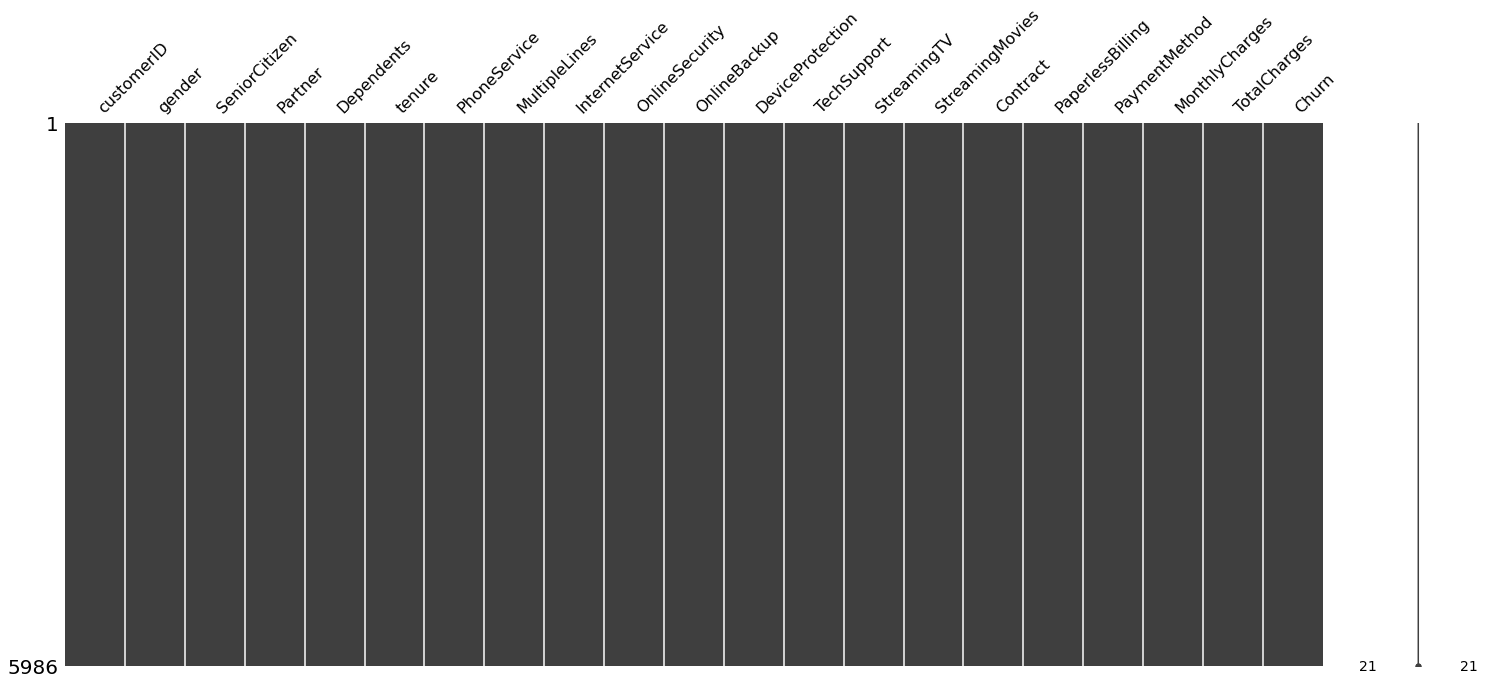

In [3]:
# 2. Визуальная оценка на пропуски
msno.matrix(df)

In [4]:
# 3.1 Выведу ряд статистик по атрибутам
df.describe(include=[np.object_])

,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,TotalCharges,Churn
count,5986,5986,5986,5986,5986,5986,5986,5986,5986,5986,5986,5986,5986,5986,5986,5986,5986,5986
unique,5986,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,5611,2
top,7010-BRBUU,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,,No
freq,1,3050,3082,4195,5396,2848,2627,2982,2605,2640,2960,2389,2356,3269,3528,2006,10,4399


In [5]:
# 3.2 Выведу ряд статистик по атрибутам
df.describe(include=[np.number])

,SeniorCitizen,tenure,MonthlyCharges
count,5986.000000,5986.000000,5986.000000
mean,0.161377,32.468760,64.802213
std,0.367909,24.516391,30.114702
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.650000
50%,0.000000,29.000000,70.400000
75%,0.000000,56.000000,89.900000
max,1.000000,72.000000,118.750000


In [6]:
# 4. Столбец TotalCharges видимо содержит значения со строками
# в № 3.1 в строке top пустая строка

# весь массив типа object, поэтому я создам массив для проверки чисел,
# где все числовые значения будут сравниваться в формате str
numbers = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '.']
# получаю серию с уникальными элементами и их кол-вом
# и для удобства перевожу в словарь
for i in df.TotalCharges.value_counts().to_dict():
    # i - ключ, но изначально в серии это значение колонки TotalCharges
    # итерация по отдельным состовляющим i, чтобы точно найти все строки, где возможно среди чисел есть буква
    
    # словарь для отлова точек, например если в значении две точки - что-то не так
    points = []
    for _ in i:
        # отлов точек
        if _ == '.':
            points.append(_)
        # отлов строковых значений
        if _ not in numbers or len(points) > 1:
            quan = df.TotalCharges.value_counts().to_dict()[i]
            print(f'Обнаружено не число: \"{i}", в количестве {quan}')


Обнаружено не число: " ", в количестве 10


Столбец TotalCharges содержит пустые строки, остальные значения типа object, изменю на float.

Заменять пропуски не имеет смысла, тк не до конца ясно как складывается оплата: `кол-во месяцев сколько человек являлся клиентом компании` * `месячный размер оплаты на настоящий момент` ≠ `общая сумма, которую клиент заплатил за услуги за все время`

Поэтому я просто не буду брать эти 10 строк там, где нужны числовые значения

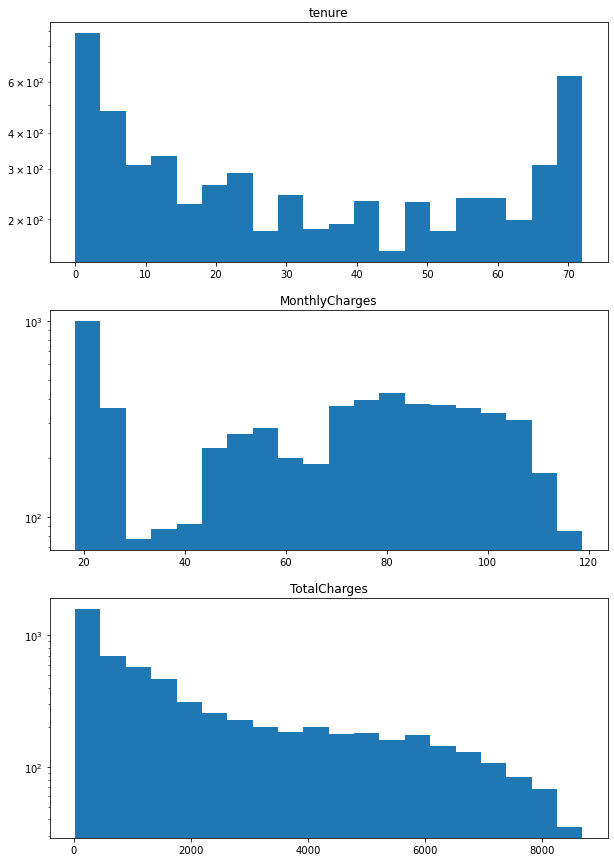

In [7]:
# 5. У меня есть 3 количественных признака, посмотрю на их распределение
fig, axs = plt.subplots(nrows=3, ncols=1, figsize=(10, 15))
data1 = [df.tenure, df.MonthlyCharges, pd.to_numeric(df.TotalCharges, errors='coerce')]
for col in range(0, 3):
    ax = axs[col]
    ax.hist(data1[col], log=True, bins=20)
    ax.set_title(data1[col].name)
plt.show()

In [8]:
 def boxplot(series):
    """Строит ящик с усами"""
    
    plt.figure(figsize=(12, 6))
    sns.boxplot(x=series)
        
    plt.title('Распределение \"' + series.name + '\"', fontsize=14)
    # для себя чтобы точнее видеть соответствие со шкалами
    plt.grid(axis='x')
    
    plt.show()

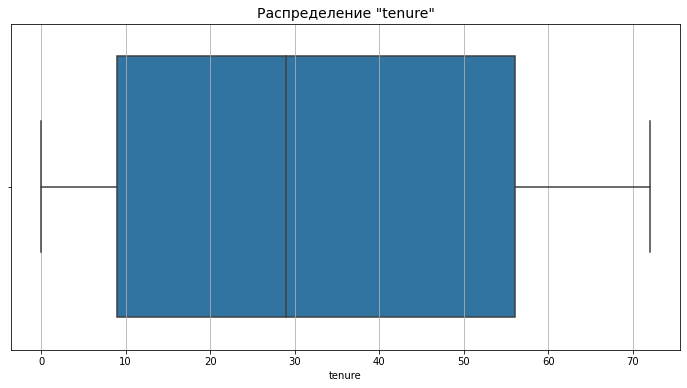

In [9]:
boxplot(df.tenure)

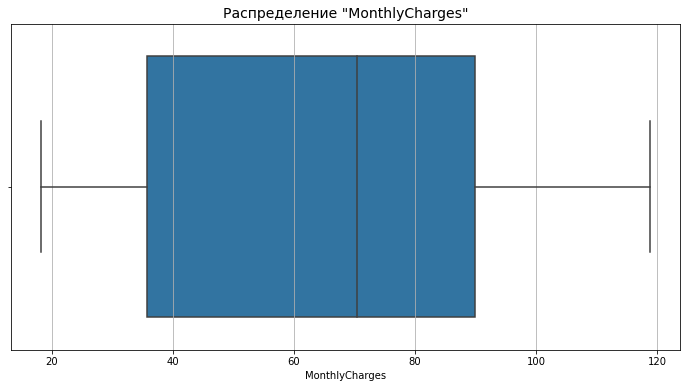

In [10]:
boxplot(df.MonthlyCharges)

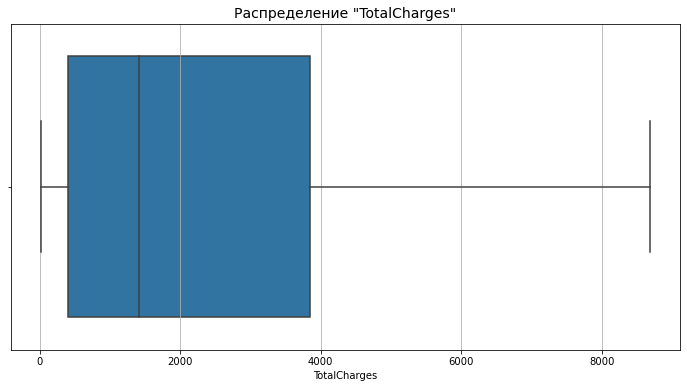

In [11]:
boxplot(pd.to_numeric(df.TotalCharges, errors='coerce'))

**Вывод:**
1. Датасет содержит в себе 5986 строк и 21 столбец, значений NaN не обнаружено,<br>
   но есть пустые строки `' '` в столбце TotalCharges.
2. В датасете содержится информация о 5986 уникальных клиентах, больше всего мужского пола, также большинство клиентов не женаты, не имеют иждевенцев, имеют услугу подключенной телефонной связи, имеют одну телефонную линию, тип контракта Month-to-month, метод оплаты Electronic check, а самый популярный интернет-провайдер - Fiber optic.
3. Самый большой срок пользования услугами - 72 месяца, медиана - 29, минимально - 0.
4. Самая большая стоимость месячного платежа - 118.75, медиана - 70.4, минимально - 18.25.

# 2. Исследование зависимостей и формулирование гипотез

Хочу вывести как распределяются по категориям в процентах люди, переставшие пользоваться услугами. 

In [12]:
# Сколько % пользователей из имеющихся данных ушли
len(df[df.Churn=='Yes']) / len(df) * 100

26.511861009021047

26.5% пользователей из имеющихся данных ушли

Так как компании дешевле удержать клиента, чем найти нового, то я буду смотреть зависимости прежде всего у ушедших клиентов

In [13]:
# сформирую датасет для наглядности

# список нужных мне ячеек
all_columns = ['gender', 'SeniorCitizen', 'Partner', 'Dependents',
               'PhoneService','PaperlessBilling', 'MultipleLines',
               'InternetService','OnlineSecurity', 'OnlineBackup',
               'DeviceProtection', 'TechSupport', 'StreamingTV', 
               'StreamingMovies', 'Contract', 'PaymentMethod']
# мне надо получить список,
# в котором названия столбцов потвояются в том же кол-ве раз,
# сколько имеют атрибутов
auxiliary_list = []
for attr in all_columns:
    data = df[[attr]]
    for _ in np.unique(data):
        auxiliary_list.append(attr)
        
# для последующего сшивания в мульти-индекс
attributs = []
values_list = []
for attr in all_columns:
    data = df[[attr]]
    for position in df[attr].unique():
            attributs.append(str(position))
for attr in all_columns:    
    data2 = df[df['Churn']=='Yes'][attr]    
    for n, position in enumerate(data2.value_counts().index):
        val = data2.value_counts()[n]
        val = round((val / len(df) * 100), 2)
        values_list.append(val)
        
df_interest = pd.DataFrame([attributs, auxiliary_list, values_list]).T
df_interest.columns=['attrbts', 'col', 'churn_percentage']
df_interest.set_index(['col', 'attrbts'], inplace=True)
df_interest

churn_percentage
col              attrbts                                   
gender           Male                                  13.3
                 Female                               13.21
SeniorCitizen    0                                     19.8
                 1                                     6.72
Partner          Yes                                  16.89
                 No                                    9.62
Dependents       Yes                                  21.82
                 No                                    4.69
PhoneService     Yes                                  24.02
                 No                                    2.49
PaperlessBilling No                                   19.73
                 Yes                                   6.78
MultipleLines    Yes                                  12.08
                 No                                   11.94
                 No phone service                      2.49
InternetService  No                                   18.23
                 Fiber optic                           6.63
                 DSL                                   1.65
OnlineSecurity   No internet service                  20.75
                 No                                    4.11
                 Yes                                   1.65
OnlineBackup     No internet service                  17.34
                 Yes                                   7.52
                 No                                    1.65
DeviceProtection No internet service                  17.22
                 Yes                                   7.63
                 No                                    1.65
TechSupport      No internet service                  20.41
                 No                                    4.44
                 Yes                                   1.65
StreamingTV      No internet service                  13.35
                 Yes                                  11.51
                 No                                    1.65
StreamingMovies  No internet service                  13.23
                 No                                   11.63
                 Yes                                   1.65
Contract         Two year                             23.35
                 Month-to-month                        2.47
                 One year                              0.68
PaymentMethod    Credit card (automatic)              15.07
                 Bank transfer (automatic)             4.39
                 Electronic check                      3.74
                 Mailed check                          3.31

**Зависимость оттока от значений отдельных колонок:**<br>

По имеющимся данным, клиенты, переставшие пользоваться услугами, разделились практически поровну на мужчин и женщин, большая часть из которых люди, не достигшие пенсионного возраста, но находящиеся в браке и имеющие иждивенцев. Также ими были подключены услуги телефонной связи и несколько телефонных линий. Больше всего из них имели в качестве метода оплаты - автоплатеж по кредитной карте, тип контракта - "Два-года", не пользовались безбумажным биллингом и не имели интернет провайдера. А те, кто имел провайдера, выбирали "Fiber optic" и в основном не подключали услуги онлайн-безопасности, тех. поддержки, стримингового кинотеатра, но пользовались услугами "online backup", стриминговым ТВ и страховкой оборудования.
___


### Гипотеза 1. 
Клиенты, находящиеся в браке имеют месячный платеж больше, нежели холостые

In [14]:
# Делаю выборки по условиям
partner_y = df[df.Partner=='Yes'].MonthlyCharges.median()
partner_n = df[df.Partner=='No'].MonthlyCharges.median()
print(f'Клиенты, находящиеся в браке платят {partner_y}')
print(f'Клиенты, находящиеся в браке платят {round(partner_n, 2)}')

Клиенты, находящиеся в браке платят 75.15
Клиенты, находящиеся в браке платят 67.55


In [15]:
# Добавлю разбиение с иждевенцами и пенсионерами
# чтобы посмотреть различные комбинации социального статуса

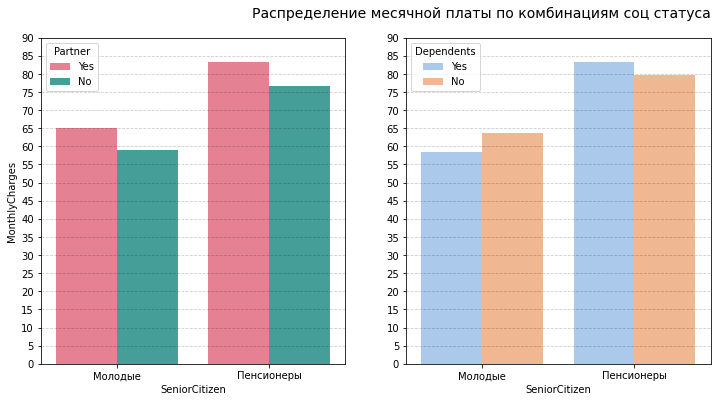

In [16]:
fig, axs = plt.subplots(nrows=1,
                        ncols=2,
                        figsize=(12, 6))
sns.barplot(data=df,
            x='SeniorCitizen',
            y='MonthlyCharges',
            hue='Partner', palette='husl', ax=axs[0], ci=False)

sns.barplot(data=df,
            x='SeniorCitizen',
            y='MonthlyCharges',
            hue='Dependents', palette='pastel', ax=axs[1], ci=False)
# настройки визуализации
axs[0].set_yticks(list(range(0, 95, 5)))
axs[0].grid(axis='y', linestyle='--', color='black', alpha=0.2)
axs[0].set_xticklabels(['Молодые', 'Пенсионеры'])
axs[1].set_yticks(list(range(0, 95, 5)))
axs[1].set_ylabel(None)
axs[1].grid(axis='y', linestyle='--', color='black', alpha=0.2)
axs[1].set_xticklabels(['Молодые', 'Пенсионеры'])
plt.title('Распределение месячной платы по комбинациям соц статуса',
                 fontsize=14, pad=20, loc='right')

plt.show()

**Вывод:** Клиенты пенсионеры, состоящие в браке и имеющие иждивенцев имеют наибольшую месячную стоимость оплаты

___

### Гипотеза 2. 
Клиенты не пенсионеры имеют больше подключенных услуг чем пенсионеры



In [17]:
# Создам новый дф для подсчета услуг и заменю значения object на int
# Копирую дф чтобы не вносить изменений в оригинальный
df_2 = df[['SeniorCitizen'] + all_columns[4:14]].copy()
# Получаю список столбцов, к которым нужно применить .cat.codes
category_type = df_2.columns[~df_2.columns.isin(['customerID', 'SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges'])]
# Изменяю тип этих столбцов к 'category' и применяю .cat.codes
df_2.loc[:, category_type] = df_2.loc[:, category_type].apply(lambda x: x.astype('category').cat.codes)
# Изменю тип обратно для подсчета
df_2.loc[:, category_type] = df_2.loc[:, category_type].astype('float64')
# Поскольку я заменил все значения на 0 и 1,
# а столбец SeniorCitizen содержит тоже 0 и 1 но для другого смысла - 
# заменю в нем 0, 1 на строковые значения чтобы не было путаницы
df_2['SeniorCitizenStr'] = df_2['SeniorCitizen'].replace([1, 0], ['retiree', 'no retiree'])
df_2.head()

,SeniorCitizen,PhoneService,PaperlessBilling,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,SeniorCitizenStr
1869,0,1.0,0.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,no retiree
4528,0,1.0,1.0,0.0,1.0,0.0,2.0,2.0,0.0,2.0,0.0,no retiree
6344,1,1.0,1.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,retiree
6739,0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,no retiree
432,0,1.0,0.0,0.0,0.0,2.0,0.0,2.0,0.0,0.0,0.0,no retiree


In [18]:
df_2_group = df_2.iloc[:, 1:].groupby('SeniorCitizenStr').agg('sum')
df_2_group

,PhoneService,PaperlessBilling,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
SeniorCitizenStr,,,,,,,,,,
no retiree,4519.0,2790.0,4485.0,4423.0,4198.0,4622.0,4568.0,4282.0,4898.0,4922.0
retiree,877.0,738.0,1201.0,786.0,519.0,849.0,833.0,479.0,1005.0,1047.0


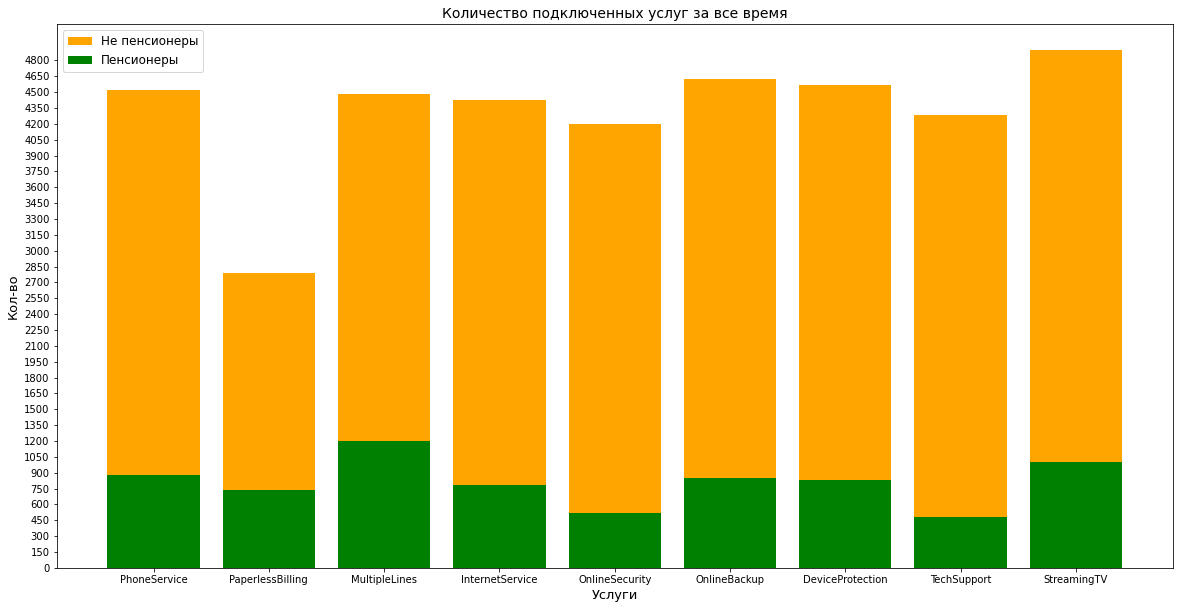

In [19]:
# Визуализация
fig, ax = plt.subplots(figsize=(20, 10))
ax.bar(df_2_group.loc['no retiree'][:-1].index,
       df_2_group.loc['no retiree'][:-1].values,
       label='Не пенсионеры', color='orange')

ax.bar(df_2_group.loc['retiree'][:-1].index,
       df_2_group.loc['retiree'][:-1].values,
       label='Пенсионеры', color='green')

ax.legend(loc='best', fontsize='large')
ax.set_title('Количество подключенных услуг за все время', fontsize=14)
ax.set_xlabel('Услуги', fontsize=13)
ax.set_ylabel('Кол-во', fontsize=13)
ax.set_yticks(list(range(0, int(df_2_group.values.max()), 150)))

plt.show()

In [20]:
# проверка для себя что все посчитал правильно
df[(df.SeniorCitizen==0) & (df.PhoneService=='Yes')].shape[0]

4519

In [21]:
# Посмотрю сколько "в среднем" подключенных услуг у молодого и старшего поколнений
df_2['Num_connected_service'] = df_2.loc[:, 'PhoneService':'StreamingMovies'].sum(axis=1)
df_2.groupby('SeniorCitizenStr').agg({'Num_connected_service':['median', 'mean']})

Num_connected_service          
                                median      mean
SeniorCitizenStr                                
no retiree                         9.0  8.706574
retiree                            9.0  8.627329

In [22]:
# Во сколько раз молодых людей больше чем пенсионеров
round(df.SeniorCitizen.value_counts()[0] / df.SeniorCitizen.value_counts()[1])

5

**Вывод:** Клиенты не пенсионеры "в среднем" имеют такое же количество подключенных услуг как и у старшего поколения, однако кол-во молодых клиентов в пять раз больше чем кол-во пенсионеров.
___

### Гипотеза 3. 
Люди, которые ушли пользовались меньшим кол-вом услуг, чем те, кто остался

In [23]:
# К дф2 добавляю значения оттока
df_3 = df_2.copy().merge(df.Churn, left_on=df_2.index, right_on=df.Churn.index)
# чтобы вернуть индекс
df_3.set_index(['key_0'], inplace=True)
df_3.index.name = 'index'
df_3.head()

,SeniorCitizen,PhoneService,PaperlessBilling,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,SeniorCitizenStr,Num_connected_service,Churn
index,,,,,,,,,,,,,,
1869,0,1.0,0.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,no retiree,11.0,No
4528,0,1.0,1.0,0.0,1.0,0.0,2.0,2.0,0.0,2.0,0.0,no retiree,9.0,No
6344,1,1.0,1.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,retiree,5.0,Yes
6739,0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,no retiree,4.0,No
432,0,1.0,0.0,0.0,0.0,2.0,0.0,2.0,0.0,0.0,0.0,no retiree,5.0,No


In [24]:
# Проверка что нет дубликатов и все "сджоинилось" как надо
df_3.shape[0] == df.shape[0]

True

In [25]:
# Проверка что индексы совпадают и все "сджоинилось" как надо
sum(df.index == df_3.index) == len(df)

True

In [26]:
df_3_visualizations = df_3.groupby('Churn').agg({'Num_connected_service':['median', 'mean']})
df_3_visualizations

Num_connected_service          
                     median      mean
Churn                                
No                      9.0  9.169357
Yes                     7.0  7.375551

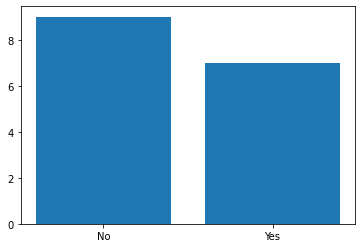

In [27]:
# Указано, что везде должна быть визуализация
data_3 = df_3_visualizations.loc[:, 'Num_connected_service']['median']
plt.bar(data_3.index, data_3.values)
plt.show()

**Вывод:** Те, кто остался, имеют в среднем на 2 подключенных услуг больше
___

### Гипотеза 4. 
Люди, которые ушли платили больше чем те, кто остался

In [28]:
df_4 = df.copy().loc[:, 'MonthlyCharges':]
df_4['TotalCharges'] = pd.to_numeric(df.TotalCharges, errors='coerce')
df_4.head()

,MonthlyCharges,TotalCharges,Churn
1869,24.10,1734.65,No
4528,88.15,3973.20,No
6344,74.95,2869.85,Yes
6739,55.90,238.50,No
432,53.45,119.50,No


In [29]:
df_4.groupby('Churn').agg({'MonthlyCharges':'median', 'TotalCharges':'median'})

,MonthlyCharges,TotalCharges
Churn,,
No,64.75,1689.45
Yes,79.50,706.60


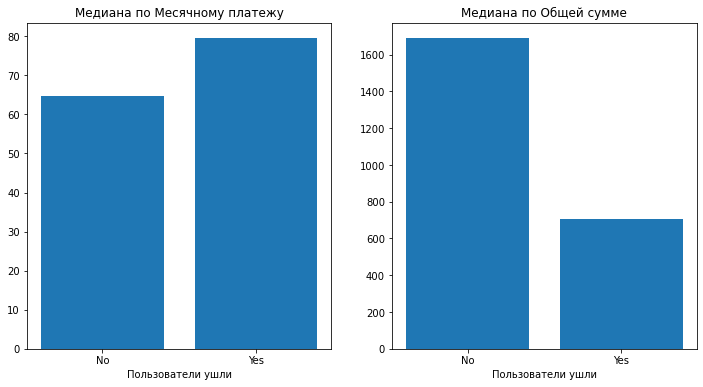

In [30]:
# Указано, что везде должна быть визуализация
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))
data_4 = df_4.groupby('Churn').agg({'MonthlyCharges':'median', 'TotalCharges':'median'})


axs[0].bar(data_4.loc[:, 'MonthlyCharges'].index,
          data_4.loc[:, 'MonthlyCharges'].values)
axs[0].set_title('Медиана по Месячному платежу')
axs[0].set_xlabel('Пользователи ушли')

axs[1].bar(data_4.loc[:, 'TotalCharges'].index,
          data_4.loc[:, 'TotalCharges'].values)
axs[1].set_title('Медиана по Общей сумме')
axs[1].set_xlabel('Пользователи ушли')

plt.show()

In [31]:
# Проверка
df4_test = df.copy()
df4_test['TotalCharges'] = pd.to_numeric(df.TotalCharges, errors='coerce')
df4_test[df.Churn=='No']['TotalCharges'].median()

1689.45

In [32]:
# Проверка
df4_test[df.Churn=='Yes']['TotalCharges'].median()

706.6

**Вывод:** Люди, переставшие пользоваться услугами имели меньшую месячную плату, но за все время заплатили больше. Возможно они пользовались услугами дольше.
___

### Гипотеза 5.
Есть зависимость между длительностью контракта и оттоком

In [33]:
# Поскольку нет данных о датах, буду смотреть по контрактам
data_5 = df.groupby('Churn').agg({'Contract':'value_counts'})
data_5

Contract
Churn Contract                
No    Month-to-month      1871
      Two year            1400
      One year            1128
Yes   Month-to-month      1398
      One year             148
      Two year              41

**Вывод:** Отток не зависит от типа контракта. Видна одна и та же иерархия по типам как у тех кто остался, так и у тех, кто ушел.

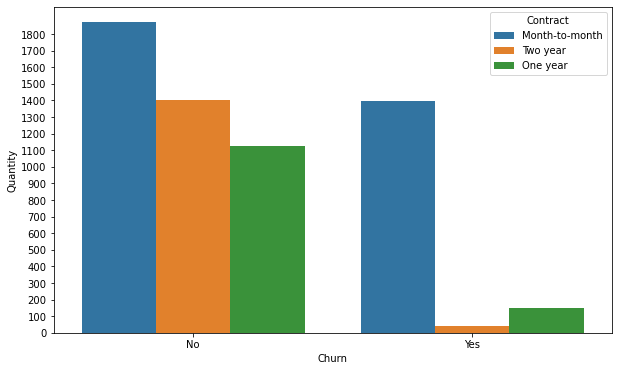

In [34]:
# Предобработка перед визуализацией
fig, ax = plt.subplots(figsize=(10, 6))
data_5 = data_5.reset_index(level=0)
data_5.columns=['Churn', 'Quantity']
sns.barplot(data=data_5,
            x='Churn',
            y='Quantity',
            hue=data_5.index,
            ax=ax)
ax.set_yticks(list(range(0, data_5.max()[1], 100)))
plt.show()

# 3. Построение моделей для прогнозирования оттока

**Часть 1:** Преобразование данных

In [35]:
# Так как многие классификаторы уязвимы к типам данных,
# переведу значения некоторых столбцов к типу int
# Копирую дф чтобы не вносить изменений в оригинальный
df_clf = df[df.TotalCharges!=' '].copy()
# Получаю список столбцов, к которым нужно применить .cat.codes
category_type = df_clf.columns[~df_clf.columns.isin(['customerID', 'SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges'])]
# Изменяю тип этих столбцов к 'category' и применяю .cat.codes
df_clf.loc[:, category_type] = df_clf.loc[:, category_type].apply(lambda x: x.astype('category').cat.codes)
# Проверка типов данных в новом дф
df_clf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5976 entries, 1869 to 860
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        5976 non-null   object 
 1   gender            5976 non-null   int8   
 2   SeniorCitizen     5976 non-null   int64  
 3   Partner           5976 non-null   int8   
 4   Dependents        5976 non-null   int8   
 5   tenure            5976 non-null   int64  
 6   PhoneService      5976 non-null   int8   
 7   MultipleLines     5976 non-null   int8   
 8   InternetService   5976 non-null   int8   
 9   OnlineSecurity    5976 non-null   int8   
 10  OnlineBackup      5976 non-null   int8   
 11  DeviceProtection  5976 non-null   int8   
 12  TechSupport       5976 non-null   int8   
 13  StreamingTV       5976 non-null   int8   
 14  StreamingMovies   5976 non-null   int8   
 15  Contract          5976 non-null   int8   
 16  PaperlessBilling  5976 non-null   int8  

In [36]:
# Проверка что все как надо
df_clf.shape == (df.shape[0]-10, df.shape[1])

True

In [37]:
# В большинстве колонок я привел данные к определенному масштабу -
# колонки tenure, MonthlyCharges, TotalCharges в этот масштаб не вписываются

# Стандартные импорты
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Разбиение данных для подсчета скора без трансформации
x_train0, x_test0, y_train0, y_test0 = train_test_split(
    df_clf.iloc[:, 1:-1], # не брать айди покупателя
    df_clf.iloc[:, -1],
    test_size=0.3,
    random_state=17)

# Обучение и предикт
knn = KNeighborsClassifier(n_neighbors=5)
knn_model = knn.fit(x_train0, y_train0)
knn_prediction0 = knn.predict(x_test0)

# Метрика
accuracy = accuracy_score(y_test0, knn_prediction0)
print(f'Accuracy без трансформации: {accuracy}')

# Трансформация (использую два метода и сравню какой лучше)
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

transformed_data1 = StandardScaler()\
.fit_transform(df_clf[['tenure', 'MonthlyCharges', 'TotalCharges']].values.reshape(-1, 1)).reshape(-1)

transformed_data2 = MinMaxScaler()\
.fit_transform(df_clf[['tenure', 'MonthlyCharges', 'TotalCharges']].values.reshape(-1, 1)).reshape(-1)

# Дф без этих трех обработанных колонок и сразу отсеку Churn
no_three_cols = df_clf[df_clf.columns[~df_clf.columns.isin(['tenure', 'MonthlyCharges', 'TotalCharges', 'Churn'])]]

# Для склеивания первой трансформации с дф
# (df_clf.shape[0], 3) - длина датасета и ширина массива признаков, которые я трансформировал;
# [:, 0], [:, 1], [:, 2] - чтобы брать три фичи поочередно
tenure1 = pd.Series(transformed_data1.reshape(df_clf.shape[0], 3)[:, 0], name='tenure', index=no_three_cols.index)
MonthlyCharges1 = pd.Series(transformed_data1.reshape(df_clf.shape[0], 3)[:, 1], name='MonthlyCharges', index=no_three_cols.index)
TotalCharges1 = pd.Series(transformed_data1.reshape(df_clf.shape[0], 3)[:, 2], name='TotalCharges', index=no_three_cols.index)

# Для склеивания второй трансформации с дф
tenure2 = pd.Series(transformed_data2.reshape(df_clf.shape[0], 3)[:, 0], name='tenure', index=no_three_cols.index)
MonthlyCharges2 = pd.Series(transformed_data2.reshape(df_clf.shape[0], 3)[:, 1], name='MonthlyCharges', index=no_three_cols.index)
TotalCharges2 = pd.Series(transformed_data2.reshape(df_clf.shape[0], 3)[:, 2], name='TotalCharges', index=no_three_cols.index)

# Склеивание по первой трансформации
transform1 = pd.concat([no_three_cols, tenure1, MonthlyCharges1, TotalCharges1], axis=1)

# Склеивание по второй трансформации
transform2 = pd.concat([no_three_cols, tenure2, MonthlyCharges2, TotalCharges2], axis=1)

# Разбиение
x_train1, x_test1, y_train1, y_test1 = train_test_split(
    transform1.iloc[:, 1:],
    df_clf.iloc[:, -1],
    test_size=0.3,
    random_state=17)

x_train2, x_test2, y_train2, y_test2 = train_test_split(
    transform2.iloc[:, 1:],
    df_clf.iloc[:, -1],
    test_size=0.3,
    random_state=17)

# Обучение и предикт
knn_model1 = knn.fit(x_train1, y_train1)
knn_prediction1 = knn.predict(x_test1)

knn_model2 = knn.fit(x_train2, y_train2)
knn_prediction2 = knn.predict(x_test2)

# Метрика
accuracy1 = accuracy_score(y_test1, knn_prediction1)
print(f'Accuracy z-score: {accuracy1}')

accuracy2 = accuracy_score(y_test2, knn_prediction2)
print(f'Accuracy MinMaxScaler: {accuracy2}')

Accuracy без трансформации: 0.7579475738984941
Accuracy z-score: 0.7506971556051311
Accuracy MinMaxScaler: 0.7428890128276632


Трансформация немного ухудшила скор, но без нее модели не обучаются - выкидывает исключение, просит трансформировать данные
___

**Вывод:** В качестве преобразованных данных я возьму:

In [38]:
transform1.iloc[:, 1:]

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,tenure,MonthlyCharges,TotalCharges
1869,1,0,1,1,1,2,2,1,1,1,1,1,1,2,0,1,-0.430430,-0.458810,0.554673
4528,0,0,0,0,1,0,1,0,2,2,0,2,0,0,1,1,-0.447019,-0.420861,1.880990
6344,0,1,1,0,1,2,1,0,0,0,0,0,0,0,1,0,-0.450574,-0.428682,1.227267
6739,1,0,0,0,1,0,0,0,0,0,0,0,2,0,1,2,-0.470719,-0.439969,-0.331780
432,1,0,0,0,1,0,0,2,0,2,0,0,0,0,0,2,-0.471904,-0.441420,-0.402287
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3772,1,0,1,0,1,0,1,2,0,0,0,2,2,0,1,2,-0.472497,-0.416803,-0.416803
5191,0,0,1,1,1,2,0,2,2,2,2,2,2,2,1,1,-0.459462,-0.419113,0.829380
5226,1,0,1,1,1,0,2,1,1,1,1,1,1,0,1,2,-0.465979,-0.460558,-0.291758
5390,1,1,0,0,1,2,1,0,0,2,0,2,2,0,1,2,-0.465979,-0.414166,0.237987


In [39]:
# Посмотрим что даст уменьшение размерности

# Импорт библиотек
from sklearn.metrics import accuracy_score

# Вспомогательная функция
def eval_model(input_x, input_y):
    """Обучаем и валидируем модель"""
    X_train, X_test, y_train, y_test = train_test_split(
        input_x, input_y, test_size=0.3, stratify=y, random_state=42
    )
    # Для обучения возьму неглубокое дерево решений
    knn_model = knn.fit(X_train, y_train)
    knn_prediction = knn.predict(X_test)
    acc_score = accuracy_score(y_test, knn_prediction)
    return acc_score

# Первый метод
from sklearn.decomposition import PCA

# для удобства
X = transform1.iloc[:, 1:]
y = df_clf.Churn

# Трансформация
pca = PCA(n_components=19).fit(X)
X_pca = pca.transform(X)
acc_score = eval_model(X_pca, y)
print('Accuracy PCA: %.5f' % acc_score)

# Второй метод
from sklearn.decomposition import TruncatedSVD

# Трансформация
# получаем svd разложение
svd_model = TruncatedSVD(n_components=18).fit(X)
# применим преобразование к исходным данным
X_svd = svd_model.transform(X)
acc_score = eval_model(X_svd, y)
print('Accuracy SVD: %.5f' % acc_score)

Accuracy PCA: 0.76799
Accuracy SVD: 0.76631


Снижение размерности `PCA` помогло поднять score c ~ 75 до 76 

**Часть 2:** Построение моделей

Я хочу задействовать наиболее производительные на мой взгляд алгоритмы, которые были изучены в курсе. Для выполнения задачи классификации я привел данные к числовому типу.

In [40]:
# Импорт моделей классификации, которые хочу задействовать
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

# Для настройки гипер-параметров
from sklearn.model_selection import GridSearchCV

# Модели
dtc = DecisionTreeClassifier(random_state=17)
svc = SVC(random_state=17)
lr = LogisticRegression(random_state=17, n_jobs=-1)

# Параметры базовых алгоритмов

dtc_params = {'max_depth': range(1, 6), 
               'max_features': range(1, 10)}

svc_params = {'kernel': ['linear', 'rbf'], # SVC
              'C': np.arange(0.1, 1, 0.2)}

lr_params = {'C': np.arange(0.5, 1, 0.1)}


# Разделяю  датасет
X_train, X_test, Valid_train, Valid_test = train_test_split\
        (X_pca, y, random_state=17, test_size=0.3)

In [41]:
%%time
# Опредение объектов для всех алгоритмов
dtc_grid = GridSearchCV(estimator=dtc, cv=5, param_grid=dtc_params, n_jobs=-1)
svc_grid = GridSearchCV(estimator=svc, cv=5, param_grid=svc_params, n_jobs=-1)
lr_grid = GridSearchCV(estimator=lr, cv=5, param_grid=lr_params, n_jobs=-1)

CPU times: total: 0 ns
Wall time: 0 ns


In [42]:
%%time
#  Обучаю каждый из объектов и выведу лучшее сочетание параметров
dtc_grid.fit(X_train, Valid_train)
svc_grid.fit(X_train, Valid_train)
lr_grid.fit(X_train, Valid_train)

print(f'Лучшее сочетание параметров для DecisionTreeClassifier: {dtc_grid.best_params_}')
print(f'Лучшее сочетание параметров для SVC: {svc_grid.best_params_}')
print(f'Лучшее сочетание параметров для LogisticRegression: {lr_grid.best_params_} \n')

Лучшее сочетание параметров для DecisionTreeClassifier: {'max_depth': 5, 'max_features': 4}
Лучшее сочетание параметров для SVC: {'C': 0.5000000000000001, 'kernel': 'rbf'}
Лучшее сочетание параметров для LogisticRegression: {'C': 0.6} 

CPU times: total: 1.02 s
Wall time: 7.12 s


# 4. Сравнение качества моделей 

In [43]:
# В качестве метрики я выбрал долю правильных ответов
# Делаю предсказания
dtc_prediction = dtc_grid.predict(X_test)
svc_prediction = svc_grid.predict(X_test)
lr_prediction = lr_grid.predict(X_test)

# Считаю accuracy_score
ac_dtc = accuracy_score(Valid_test, dtc_prediction)
ac_svc = accuracy_score(Valid_test, svc_prediction)
ac_lr = accuracy_score(Valid_test, lr_prediction)

print('accuracy for dtc: %.5f' % ac_dtc)
print('accuracy for svc: %.5f' % ac_svc)
print('accuracy for lr: %.5f' % ac_lr)

accuracy for dtc: 0.76352
accuracy for svc: 0.79141
accuracy for lr: 0.78137


**Вывод:** Метод опорных векторов из всех трех моделей отработал лучше всего. Мной была проделана работа по анализу, предобработке данных и построению моделей машинного обучения с целью получить предсказания оттока.